In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import os
import scipy.io
import matplotlib
import matplotlib.pyplot as plt

In [33]:
from shot_benchmarks.utils import metrics
from sklearn.metrics import auc
from shot_benchmarks.detectors.ffprobe_shots import extract_shots_with_ffprobe
from shot_benchmarks.detectors.shotdetect_shots import extract_shots_with_shotdetect
from shot_benchmarks.detectors.shotdetect_shots import extract_boundaries_from_shotdetect_output
from shot_benchmarks.detectors.pyscenedetect_shots import extract_shots_with_pyscenedetect

###Test Data

The test data consists of three youtube videos:

* [football clip](https://www.youtube.com/watch?v=vFT8HXJlvfA) (05:11) 
* [movie clip](https://www.youtube.com/watch?v=bpLtXIlkyYA) (03:12)
* [gameshow clip](https://www.youtube.com/watch?v=fkiDpLlQ9Wg) (29:45, but only first 05:00 used)

A shot boundary prediction is considered correct if it lies within the number of seconds given by `TOLERANCE` of the human annotated boundary

#PR curves with tuned parameters

###Gameshow clip

In [34]:
video = 'gameshow'
TOLERANCE = 0.2 

In [35]:
parent_dir = os.path.abspath('..')
src_video = '{}/raw/{}.mp4'.format(parent_dir, video)

Load human annotations

In [36]:
annotations_csv = '{}/annotations/{}.csv'.format(parent_dir, video)
gt_shot_boundaries = metrics.get_ground_truth(annotations_csv)
num_pos = len(gt_shot_boundaries)

No changes made for the gameshow video clip

In [37]:
ffprobe_threshold = 0.3
shotdetect_threshold = 60
pyscenedetect_threshold = 30

FFprobe predictions

In [38]:
ff_predictions = extract_shots_with_ffprobe(src_video, threshold=ffprobe_threshold)
ff_ranked_predictions = sorted(ff_predictions, key=lambda x: x[1], reverse=True)
ff_results = metrics.evaluate_shot_predictions(ff_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
ff_precision, ff_recall = metrics.get_precision_recall(ff_results, num_pos)
ff_auc = auc(ff_recall, ff_precision)

Shotdetect predictions

In [39]:
sd_predictions = extract_shots_with_shotdetect(src_video, video, threshold=shotdetect_threshold);
sd_ranked_predictions = sorted(sd_predictions, key=lambda x: x[1], reverse=True)
sd_results = metrics.evaluate_shot_predictions(sd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
sd_precision, sd_recall = metrics.get_precision_recall(sd_results, num_pos)
sd_auc = auc(sd_recall, sd_precision)

PySceneDetect predictions

In [40]:
psd_predictions = extract_shots_with_pyscenedetect(src_video, threshold=pyscenedetect_threshold, min_scene_length=15)
psd_ranked_predictions = sorted(psd_predictions, key=lambda x: x[1], reverse=True)
psd_results = metrics.evaluate_shot_predictions(psd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
psd_precision, psd_recall = metrics.get_precision_recall(psd_results, num_pos)
psd_auc = auc(psd_recall, psd_precision)

[PySceneDetect] Parsing video gameshow.mp4...
[PySceneDetect] Video Resolution / Framerate: 384 x 288 / 25.000 FPS
Verify that the above parameters are correct (especially framerate, use --force-fps to correct if required).


In [41]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 11.5}
matplotlib.rc('font', **font)

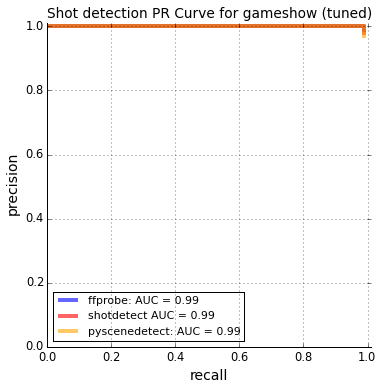

In [42]:
fig, ax = plt.subplots(figsize=(5.8,5.8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(ff_recall, ff_precision, lw=4, alpha=0.6, color="blue", label='ffprobe: AUC = {}'.format(round(ff_auc, 2)))
plt.plot(sd_recall, sd_precision, lw=4, alpha=0.6, color="red", label='shotdetect AUC = {}'.format(round(sd_auc, 2)))
plt.plot(psd_recall, psd_precision, lw=4, alpha=0.6, color="orange", label='pyscenedetect: AUC = {}'.format(round(psd_auc, 2)))
plt.grid()
plt.legend(loc='lower left', fontsize=11)
plt.title('Shot detection PR Curve for {} (tuned)'.format(video))
plt.ylim([0,1.01])
plt.xlim([0,1.01])
plt.ylabel('precision', fontsize=14)
plt.xlabel('recall', fontsize=14)
plt.savefig('{}/figures/{}-tuned'.format(parent_dir, video))

###Footabll clip

In [16]:
video = 'football'
TOLERANCE = 0.35 # for football, there are slower shot transitions so a larger tolerance is given

In [17]:
ffprobe_threshold = 0
shotdetect_threshold = 20 
pyscenedetect_threshold = 21

In [18]:
parent_dir = os.path.abspath('..')
src_video = '{}/raw/{}.mp4'.format(parent_dir, video)

load human annotations

In [19]:
annotations_csv = '{}/annotations/{}.csv'.format(parent_dir, video)
gt_shot_boundaries = metrics.get_ground_truth(annotations_csv)
num_pos = len(gt_shot_boundaries)

FFprobe predictions

In [20]:
ff_predictions = extract_shots_with_ffprobe(src_video, threshold=ffprobe_threshold)
ff_ranked_predictions = sorted(ff_predictions, key=lambda x: x[1], reverse=True)
ff_results = metrics.evaluate_shot_predictions(ff_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
ff_precision, ff_recall = metrics.get_precision_recall(ff_results, num_pos)
ff_auc = auc(ff_recall, ff_precision)

Shotdetect predictions

In [21]:
sd_predictions = extract_shots_with_shotdetect(src_video, video, threshold=shotdetect_threshold);
sd_ranked_predictions = sorted(sd_predictions, key=lambda x: x[1], reverse=True)
sd_results = metrics.evaluate_shot_predictions(sd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
sd_precision, sd_recall = metrics.get_precision_recall(sd_results, num_pos)
sd_auc = auc(sd_recall, sd_precision)

PySceneDetect predictions

In [22]:
psd_predictions = extract_shots_with_pyscenedetect(src_video, threshold=pyscenedetect_threshold, min_scene_length=15)
psd_ranked_predictions = sorted(psd_predictions, key=lambda x: x[1], reverse=True)
psd_results = metrics.evaluate_shot_predictions(psd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
psd_precision, psd_recall = metrics.get_precision_recall(psd_results, num_pos)
psd_auc = auc(psd_recall, psd_precision)

[PySceneDetect] Parsing video football.mp4...
[PySceneDetect] Video Resolution / Framerate: 640 x 360 / 25.000 FPS
Verify that the above parameters are correct (especially framerate, use --force-fps to correct if required).


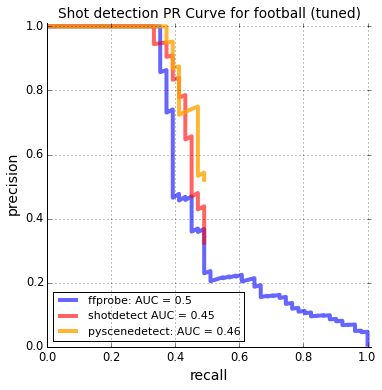

In [23]:
fig, ax = plt.subplots(figsize=(5.8,5.8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(ff_recall, ff_precision, lw=4, alpha=0.6, color="blue", label='ffprobe: AUC = {}'.format(round(ff_auc, 2)))
plt.plot(sd_recall, sd_precision, lw=4, alpha=0.6, color="red", label='shotdetect AUC = {}'.format(round(sd_auc, 2)))
plt.plot(psd_recall, psd_precision, lw=4, alpha=0.8, color="orange", label='pyscenedetect: AUC = {}'.format(round(psd_auc, 2)))
plt.grid()
plt.legend(loc='lower left', fontsize=11)
plt.title('Shot detection PR Curve for {} (tuned)'.format(video))
plt.ylim([0,1.01])
plt.xlim([0,1.01])
plt.ylabel('precision', fontsize=14)
plt.xlabel('recall', fontsize=14)
plt.savefig('{}/figures/{}-tuned'.format(parent_dir, video))

###Movie clip

In [24]:
video = 'movie'
TOLERANCE = 0.2 

In [25]:
ffprobe_threshold = 0.1
shotdetect_threshold = 43 
pyscenedetect_threshold = 41

In [26]:
parent_dir = os.path.abspath('..')
src_video = '{}/raw/{}.mp4'.format(parent_dir, video)

In [27]:
annotations_csv = '{}/annotations/{}.csv'.format(parent_dir, video)
gt_shot_boundaries = metrics.get_ground_truth(annotations_csv)
num_pos = len(gt_shot_boundaries)

ffprobe predictions

In [28]:
ff_predictions = extract_shots_with_ffprobe(src_video, threshold=ffprobe_threshold)
ff_ranked_predictions = sorted(ff_predictions, key=lambda x: x[1], reverse=True)
ff_results = metrics.evaluate_shot_predictions(ff_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
ff_precision, ff_recall = metrics.get_precision_recall(ff_results, num_pos)
ff_auc = auc(ff_recall, ff_precision)

Shotdetect predictions

In [29]:
sd_predictions = extract_shots_with_shotdetect(src_video, video, threshold=shotdetect_threshold);
sd_ranked_predictions = sorted(sd_predictions, key=lambda x: x[1], reverse=True)
sd_results = metrics.evaluate_shot_predictions(sd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
sd_precision, sd_recall = metrics.get_precision_recall(sd_results, num_pos)
sd_auc = auc(sd_recall, sd_precision)

PySceneDetect predictions

In [30]:
psd_predictions = extract_shots_with_pyscenedetect(src_video, threshold=pyscenedetect_threshold, min_scene_length=15)
psd_ranked_predictions = sorted(psd_predictions, key=lambda x: x[1], reverse=True)
psd_results = metrics.evaluate_shot_predictions(psd_ranked_predictions, gt_shot_boundaries, tolerance=TOLERANCE)
psd_precision, psd_recall = metrics.get_precision_recall(psd_results, num_pos)
psd_auc = auc(psd_recall, psd_precision)

[PySceneDetect] Parsing video movie.mp4...
[PySceneDetect] Video Resolution / Framerate: 640 x 256 / 25.000 FPS
Verify that the above parameters are correct (especially framerate, use --force-fps to correct if required).


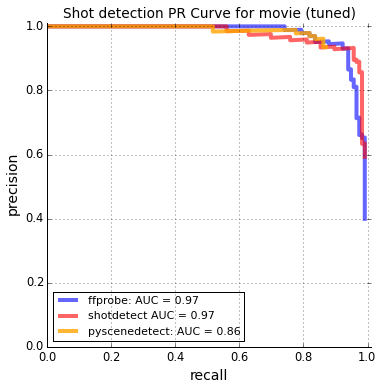

In [31]:
fig, ax = plt.subplots(figsize=(5.8,5.8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(ff_recall, ff_precision, lw=4, alpha=0.6, color="blue", label='ffprobe: AUC = {}'.format(round(ff_auc, 2)))
plt.plot(sd_recall, sd_precision, lw=4, alpha=0.6, color="red", label='shotdetect AUC = {}'.format(round(sd_auc, 2)))
plt.plot(psd_recall, psd_precision, lw=4, alpha=0.8, color="orange", label='pyscenedetect: AUC = {}'.format(round(psd_auc, 2)))
plt.grid()
plt.legend(loc='lower left', fontsize=11)
plt.title('Shot detection PR Curve for {} (tuned)'.format(video))
plt.ylim([0,1.01])
plt.xlim([0,1.01])
plt.ylabel('precision', fontsize=14)
plt.xlabel('recall', fontsize=14)
plt.savefig('{}/figures/{}-tuned'.format(parent_dir, video))